# Neurosynth decoding

###  Wir machen uns eine Liste mit allen unseren Hirnbildern

In [1]:
import os

In [2]:
imgList = ['../meanTraining/%s'%x for x in os.listdir('../meanTraining/')]; imgList.sort()

### Whole-Brain Maske

Hier benutzen wir eine grobe Maske mit 4mm Auflösung, weil die Berechnungen sonst zu lange dauern

In [3]:
from nilearn import image, plotting, input_data 

In [4]:
import pickle

Die Maske habe ich vorbereitet, die laden wir als hinterlegtes Objekt

In [5]:
my_masker = pickle.load( open( "../pickels/my4mm_masker.p", "rb" ) )

In [6]:
my_masker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../rois/gmMap4mm.nii.gz', mask_strategy='background',
      memory=Memory(cachedir=None), memory_level=1, sample_mask=None,
      sessions=None, smoothing_fwhm=None, standardize=False, t_r=None,
      target_affine=None, target_shape=None, verbose=0)

In [7]:
plotting.plot_roi(my_masker.mask_img_);

### Daten extrahieren

In [8]:
from sklearn import preprocessing

In [9]:
def extractMaps(fileName,my_masker):
    thisData = my_masker.transform(fileName)[-1]
    scaleData = preprocessing.scale(thisData)
    return scaleData

Um das Ganze erstmal beispielhaft durchzugehen, nehmen wir uns einen einzelnen Block aus unseren Daten

In [10]:
thisMap = imgList[-1]

In [11]:
thisMap

'../meanTraining/meanCond_words.nii.gz'

In [12]:
scaleMap = extractMaps(thisMap,my_masker)

/data/martin/seminarSS17/venv/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:435: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter will change in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


In [13]:
scaleMap

array([ 0.24135587,  0.71350819, -0.30984095, ...,  0.09552205,
        0.61937867,  0.65481597])

### wir laden ca. 600 Karten aus Neurosynth, die ich vorher ausgewählt habe  

Die Einschlusskriterien waren, dass die Maske nicht leer sein darf (Stichwörter wie "magnetic" sind so unspefifisch, dass sie keine Voxel enthalten; außerdem gibt es sehr viele Karten, die zwar Voxel enthalten, aber keinem inhaltlich interpertierbaren psychologischen Prozess zugeordnet werden können (z.B. white matter, young, old, patient, healthy).

In [14]:
import pandas as pd

In [15]:
nsData = pd.read_csv('../arrays/ns_4mm_database.csv',index_col=[0,1])

In [16]:
nsData.tail()

0         1         2         3         4         5  \
  Unnamed: 1                                                               
7 verbal     -0.096669 -0.096669 -0.096669 -0.096669 -0.096669 -0.096669   
  verbs      -0.143120 -0.143120 -0.143120 -0.143120  7.498145  7.815414   
  word       -0.238959 -0.238959 -0.238959 -0.238959  4.465387  4.689173   
  words      -0.268781 -0.268781 -0.268781 -0.268781  3.830119  4.113190   
  written    -0.133325 -0.133325 -0.133325 -0.133325 -0.133325 -0.133325   

                     6         7         8         9    ...        18734  \
  Unnamed: 1                                            ...                
7 verbal     -0.096669 -0.096669 -0.096669 -0.096669    ...    -0.096669   
  verbs       7.668591  7.714716  7.300322 -0.143120    ...    -0.143120   
  word        4.569203  4.486181 -0.238959 -0.238959    ...    -0.238959   
  words       4.155813  4.230690 -0.268781 -0.268781    ...    -0.268781   
  written    -0.133325 -0.133325 -0.133325 -0.133325    ...    -0.133325   

                 18735     18736     18737     18738     18739     18740  \
  Unnamed: 1                                                               
7 verbal     -0.096669 -0.096669 -0.096669 -0.096669 -0.096669 -0.096669   
  verbs      -0.143120 -0.143120 -0.143120 -0.143120 -0.143120 -0.143120   
  word       -0.238959 -0.238959 -0.238959 -0.238959 -0.238959 -0.238959   
  words      -0.268781 -0.268781 -0.268781 -0.268781 -0.268781 -0.268781   
  written    -0.133325 -0.133325 -0.133325 -0.133325 -0.133325 -0.133325   

                 18741     18742     18743  
  Unnamed: 1                                
7 verbal     -0.096669 -0.096669 -0.096669  
  verbs      -0.143120 -0.143120 -0.143120  
  word       -0.238959 -0.238959 -0.238959  
  words      -0.268781 -0.268781 -0.268781  
  written    -0.133325 -0.133325 -0.133325  

[5 rows x 18744 columns]

In [17]:
clusterNames =  pickle.load( open( "../pickels/clusterDict.p", "rb" ) )

In [18]:
clusterNames

{'0': 'default',
 '1': 'motor',
 '2': 'reward',
 '3': 'auditory',
 '4': 'emotion',
 '5': 'task',
 '6': 'objects',
 '7': 'language'}

## Korrelation eines Blocks unserer Daten mit allen 602 Karten

In [19]:
import numpy as np

In [20]:
thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]

In [21]:
thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T

In [22]:
thisCorrDf

0                                                 \
Unnamed: 1   angular angular gyrus anterior medial autobiographical   
corr       -0.089147     -0.094056       -0.020509        -0.018675   

                                                                       \
Unnamed: 1 autobiographical memory    belief   beliefs cognitive task   
corr                     -0.023303 -0.058398 -0.069088      -0.025696   

                                  ...            7                      \
Unnamed: 1  coherent component    ...    sentences  speakers syntactic   
corr       -0.036316 -0.027191    ...     0.071023  0.030915  0.075935   

                                                                              \
Unnamed: 1 temporal cortex      verb    verbal     verbs      word     words   
corr              0.055863  0.088866  0.059839  0.093891  0.108848  0.117209   

                      
Unnamed: 1   written  
corr        0.042794  

[1 rows x 602 columns]

### Wir sortieren nach Stärke der Korrelation

Sonst müssten wir die 602 Korrelationen einzeln durchgehen um bedeutsame Zusammenhänge zu finden.

In [23]:
def getTop(corrDf):
    sortDf = corrDf.copy()
    sortDf = sortDf.T.sort_values(by=sortDf.index[-1],ascending=False)
    topDf = pd.concat([sortDf[:5],sortDf[-5:]],axis=0)
    topDf.columns = ['correlation']
    topDf = topDf.round(2)
    return topDf

In [24]:
topDf = getTop(thisCorrDf)

Beispiel: Die fünf höchstn und die fünf niedrigsten Korrelationen des gewählten Blocks

In [25]:
topDf

correlation
  Unnamed: 1                        
7 reading                       0.13
  words                         0.12
  language                      0.11
  word                          0.11
  lexical                       0.11
0 component ica                -0.09
  angular gyrus                -0.09
  independent component        -0.09
5 inferior parietal            -0.12
0 precuneus                    -0.13

## Die 602 Karten in Neurosynth nach Ähnlichkeit gruppieren

Wir haben gesagt, dass die 602 Karten in Cluster eingeteilt sind. Können wir das irgendwie darstellen? Ja, indem wir die 18744 Dimensionen (jeder Voxel ist eine Dimension) auf 2 Dimensionen projizieren. Dazu verwenden wir [Multidimensionale Skalierung](http://scikit-learn.org/stable/modules/manifold.html).

In [26]:
# hier verwenden wir Daten die ich vorbereitet habe
dissDf = pd.read_csv('../arrays/dissDf.csv',index_col=[0])
mdsPositions = np.array(pd.read_csv('../arrays/mdsDf.csv',index_col=[0]))
mdsDf = pd.DataFrame(mdsPositions,index=dissDf.index)

In [27]:
# plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

Acht Fraben für die acht Cluster:

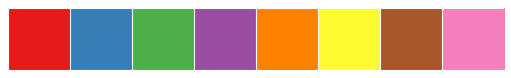

In [28]:
myPalette = sns.color_palette('Set1',n_colors=8)
sns.palplot(myPalette)

## Brain Space

In [29]:
# laden von vorbereiteten Sachen
mdsDf = pd.read_csv('../arrays/mdsDf.csv',index_col=[0])
kDf = pd.read_csv('../arrays/kDf.csv',index_col=[0])

Abbildung erstellen

In [30]:
def findNeighbors(mdsDf,p,added,notCloserThan=50):
    
    # coordinates of this keyword
    thisDf = mdsDf.loc[p]
    
    # coordinates of all other keywords
    otherDf = mdsDf.drop(p)
    
    # lenghts of adjacent and opposite
    diffDf = abs(thisDf-otherDf)
    
    # lengths of hypoteneuse
    distanceDf = np.sqrt(diffDf**2).sum(axis=1)
    
    # check if there are close distances
    closeEncounters = distanceDf[distanceDf<notCloserThan].index
    
    # check if the close ones have already been labelled
    for entry in closeEncounters:
        if entry in added:
            return True
    
    return False

Einstellungen für Abbildung

In [31]:
sns.set_style('white')
sns.set_context('poster')

### der große Ball

In [32]:
def plotSpace(mdsDf,kDf,clusterNames,myPalette,closest,ax):

    kPredictions = list(kDf['n'])
    # loop both trough the positions and the predictions
    for p,l in zip(mdsDf.index,kPredictions):
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=12,alpha=0.8
               )

    added = []
    mdsDf = mdsDf.sort_values(by='1')
    # sorting by the x-dimension will fill the labels from right to left side
    mdsDf = mdsDf.sort_values(by='0',ascending=False)
    for p,x,y in zip(mdsDf.index,mdsDf['0'], mdsDf['1']):
        l = kDf.loc[p]
        if not findNeighbors(mdsDf,p,added,notCloserThan=closest):
            ax.annotate(p, xy = (x, y),fontsize=16,alpha=0.8)
            added.append(p)
            
    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    ax.legend(loc='lower left',bbox_to_anchor=(0.,0))
    return ax

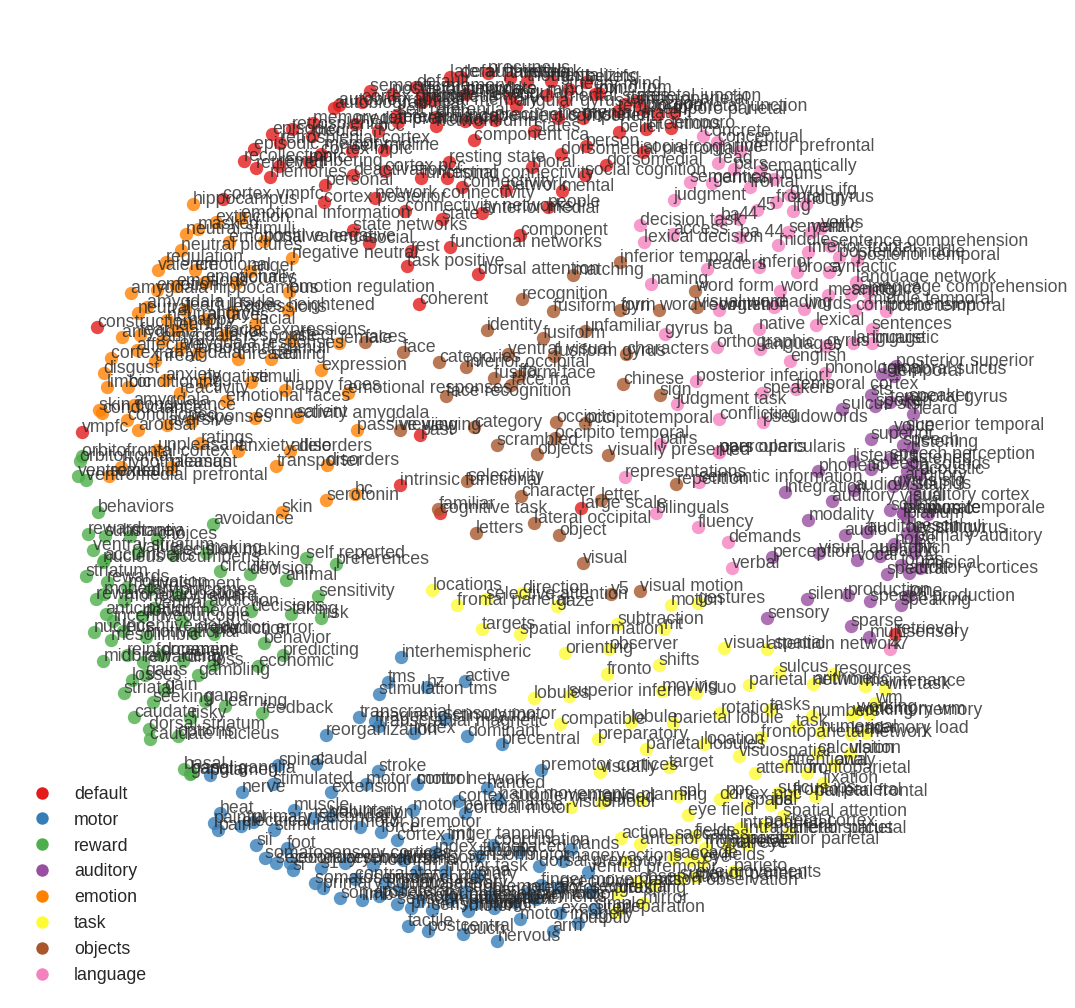

In [33]:
fig,ax = plt.subplots(1,1,figsize=(16,16))
ax = plotSpace(mdsDf,kDf,clusterNames,myPalette,0,ax)
#plt.savefig('../figs/nsBallSparse.png',dpi=300)
plt.show()

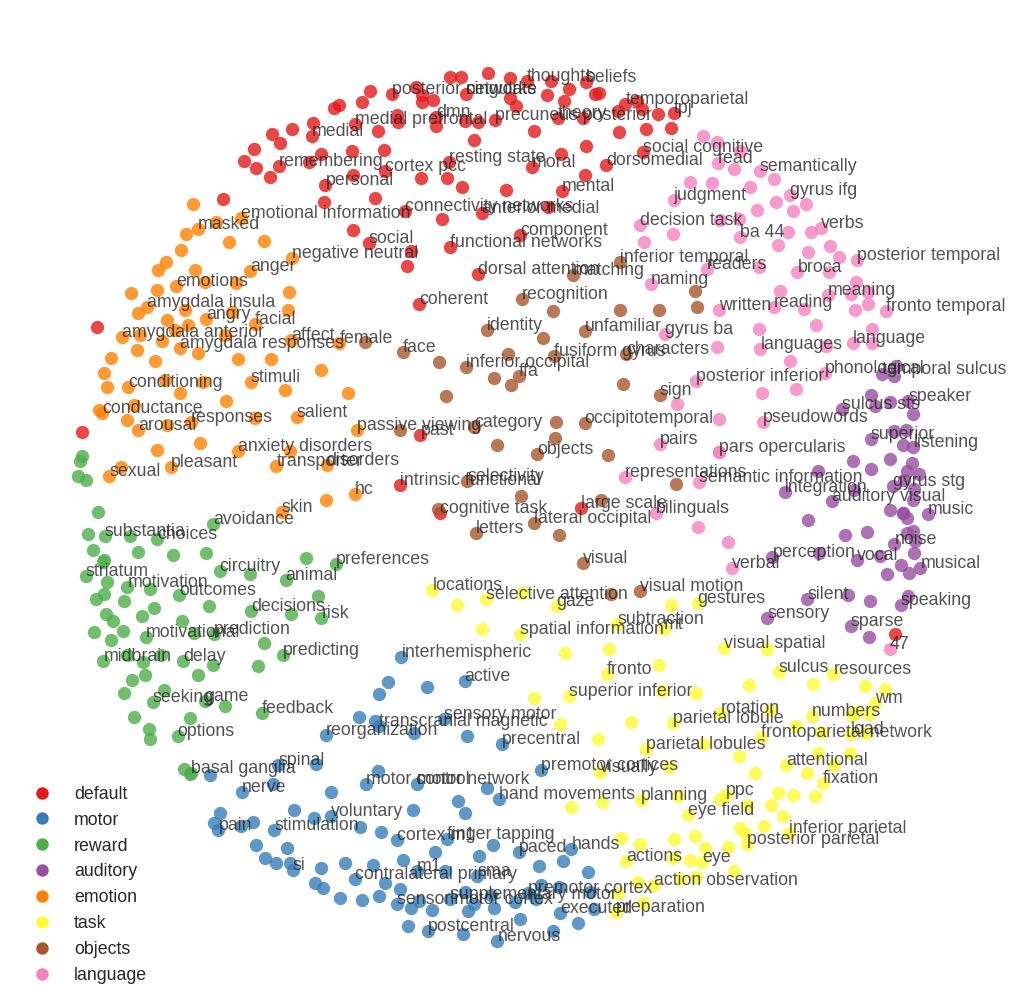

In [34]:
fig,ax = plt.subplots(1,1,figsize=(16,16))
ax = plotSpace(mdsDf,kDf,clusterNames,myPalette,50,ax)
plt.savefig('../figs/nsBallSparse.png',dpi=300)
plt.show()

## der Ball - Teil 2

In [35]:
# Skalierung der Korrelationen von 0 bis 1
def makeMinMax(corrDf):
    minMaxDf = pd.DataFrame( preprocessing.minmax_scale(corrDf,axis=1),
                            index=corrDf.index,
                            columns=corrDf.columns )
    return minMaxDf.T

In [36]:
minMaxDf = makeMinMax(thisCorrDf)

In [37]:
thisCorrDf

0                                                 \
Unnamed: 1   angular angular gyrus anterior medial autobiographical   
corr       -0.089147     -0.094056       -0.020509        -0.018675   

                                                                       \
Unnamed: 1 autobiographical memory    belief   beliefs cognitive task   
corr                     -0.023303 -0.058398 -0.069088      -0.025696   

                                  ...            7                      \
Unnamed: 1  coherent component    ...    sentences  speakers syntactic   
corr       -0.036316 -0.027191    ...     0.071023  0.030915  0.075935   

                                                                              \
Unnamed: 1 temporal cortex      verb    verbal     verbs      word     words   
corr              0.055863  0.088866  0.059839  0.093891  0.108848  0.117209   

                      
Unnamed: 1   written  
corr        0.042794  

[1 rows x 602 columns]

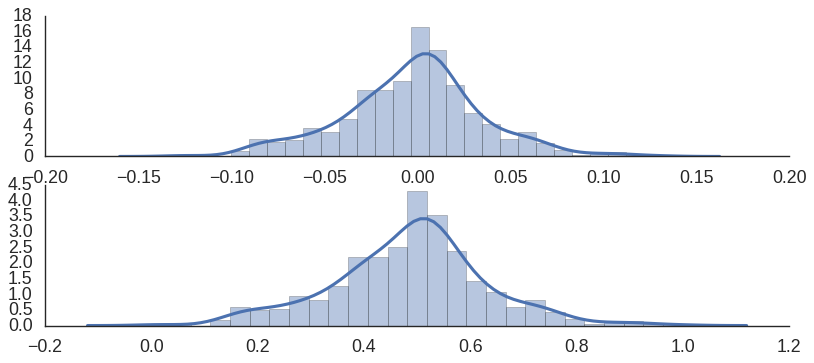

In [38]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,5))
sns.distplot(thisCorrDf.T,ax=ax1)
sns.distplot(minMaxDf,ax=ax2)
sns.despine()
plt.show()

Abbildung machen

In [39]:
def plotFullCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,ax):

    kPredictions = list(kDf['n'])
    # loop both trough the positions and the predictions
    for p,l in zip(mdsDf.index,kPredictions):
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    for p,l,x,y in zip(mdsDf.index,kPredictions, mdsDf['0'], mdsDf['1']):
        ax.annotate(p, xy = (x, y),
                    fontsize=minMaxDf.ix[l].ix[p]**3*50,
                    alpha=minMaxDf.ix[l].ix[p]**10)

            
    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

In [40]:
def plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,closest,ax):

    # loop both trough the positions and the predictions
    for p in mdsDf.index:
        l = kDf['n'].loc[p]
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    # to not omit the most important keywords, we move through the list by the order in minMaxDf
    sortedIndex = minMaxDf.sort_values('corr',ascending=False).index.labels[1]
    sortedNames = [minMaxDf.index.levels[1][x] for x in sortedIndex ]
    print sortedNames[:10]
    added = []
    for p in sortedNames:
        l = kDf['n'].loc[p]
        x = mdsDf['0'].loc[p]
        y = mdsDf['1'].loc[p]

        if not findNeighbors(mdsDf,p,added,notCloserThan=closest):

            thisVal = minMaxDf.ix[l].ix[p].values[-1]
            
            ax.annotate(p, xy = (x, y),
                    fontsize=thisVal**3*50,
                    alpha=thisVal**5)
            added.append(p)

    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

['reading', 'words', 'language', 'word', 'lexical', 'phonological', 'semantic', 'verbs', 'verb', 'inferior frontal']


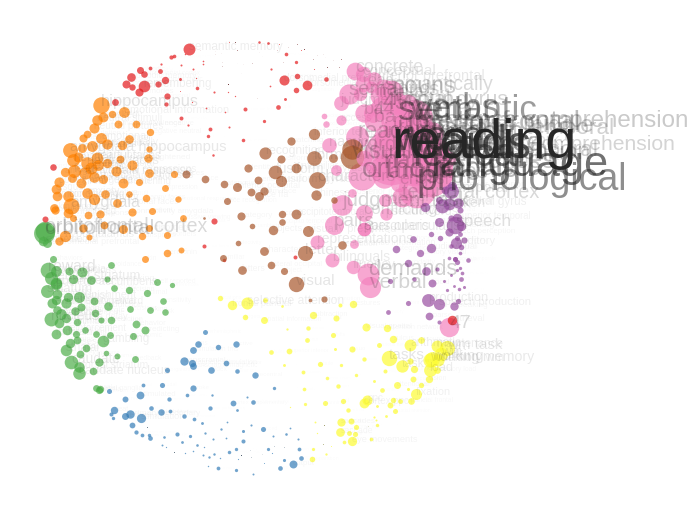

In [41]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,0,ax)
plt.show()

['reading', 'words', 'language', 'word', 'lexical', 'phonological', 'semantic', 'verbs', 'verb', 'inferior frontal']


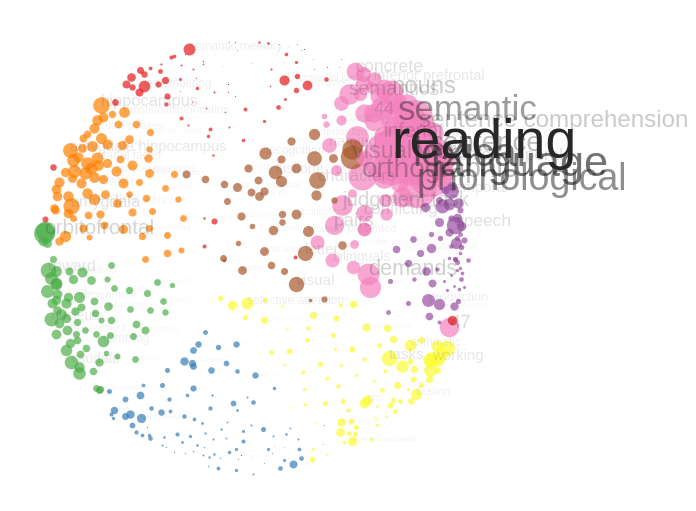

In [42]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,50,ax)
plt.show()

['reading', 'words', 'language', 'word', 'lexical', 'phonological', 'semantic', 'verbs', 'verb', 'inferior frontal']


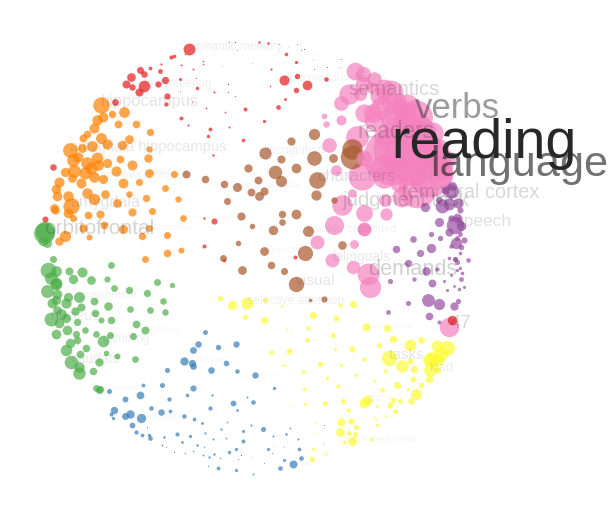

In [43]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,100,ax)
plt.show()

In [44]:
def makeMeanMindSpace(thisMap,closest=100,
                  my_masker=my_masker,nsData=nsData,mdsDf=mdsDf,kDf=kDf,
                  myPalette=myPalette,clusterNames=clusterNames):

    scaleMap = extractMaps(thisMap,my_masker)

    thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
    
    thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T
    
    minMaxDf = makeMinMax(thisCorrDf)

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    
    plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,closest,ax)
    
    fullName = thisMap.split('/')[-1].split('.')[0]
    nam = fullName.split('_')[-1]
    plt.title(nam,fontsize=32)
    
    plt.savefig('../nsfigs/synth_%s.png'%fullName,bbox_inches='tight',dpi=300)
    plt.show()

### sanity check

['faces', 'face', 'fusiform face', 'ffa', 'face ffa', 'fusiform', 'fusiform gyrus', 'facial', 'face recognition', 'fearful']


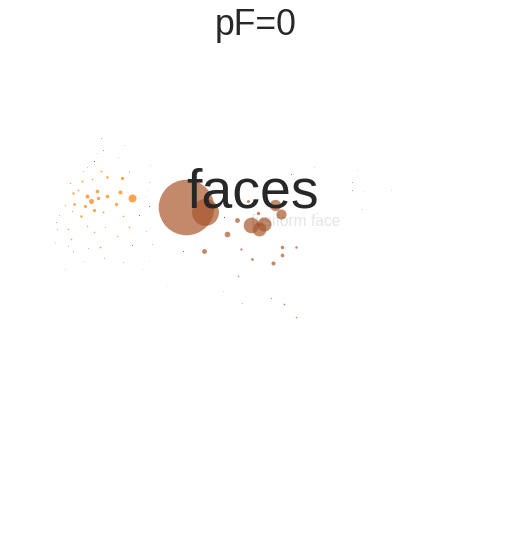

In [45]:
makeMeanMindSpace('../nsMaps/faces_pFgA_pF=0.50_FDR_0.01.nii.gz')

['ba 44', 'ba', '44', '45', 'broca', 'frontal gyrus', 'syntactic', 'inferior frontal', 'inferior', 'ifg']


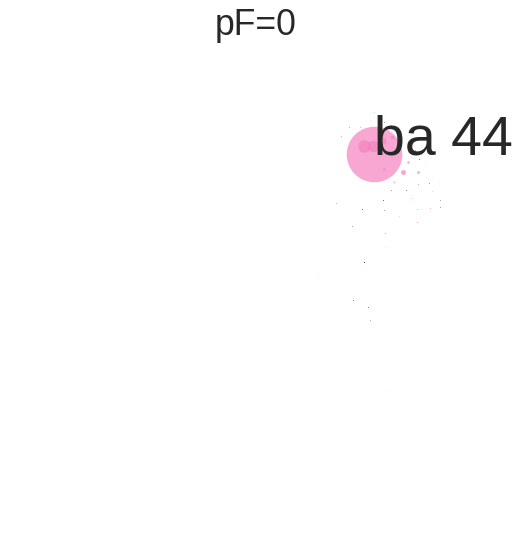

In [59]:
makeMeanMindSpace('../nsMaps/ba 44_pFgA_pF=0.50_FDR_0.01.nii.gz')

['limb', 'stimulated', 'speaking', 'person', 'supplementary motor', 'supplementary', 'mental state', 'parietal junction', 'junction', 'connectivity networks']


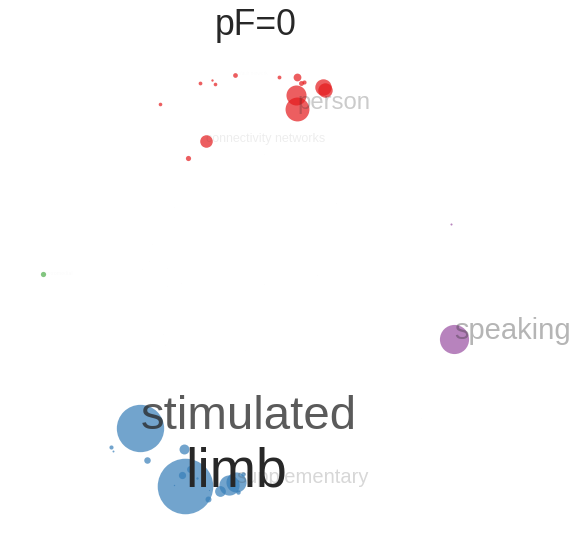

In [65]:
makeMeanMindSpace('../nsMaps/magnetic resonance_pFgA_pF=0.50_FDR_0.01.nii.gz')

### decoding of mean activity in training data

['frontal', 'resting state', 'demands', 'working memory', 'posterior cingulate', 'working', 'pcc', 'default', 'retrieval', 'cortex pcc']


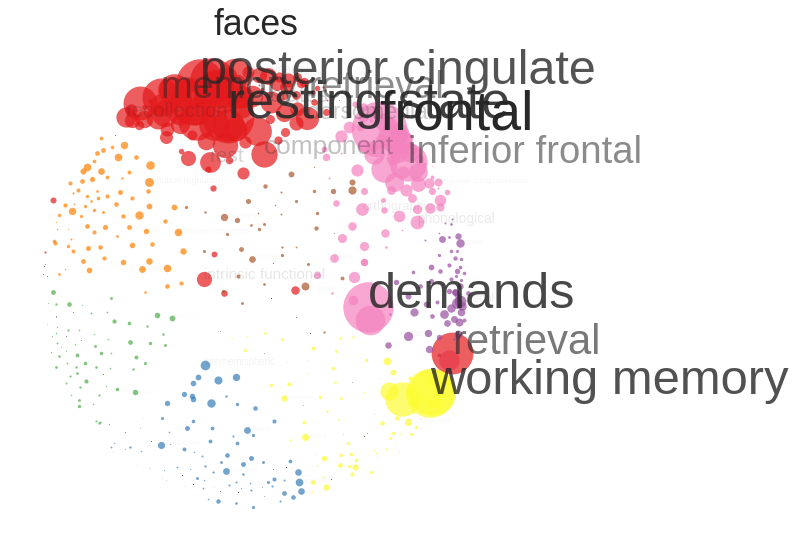

['motor', 'movements', 'movement', 'somatosensory', 'premotor', 'finger', 'motor imagery', 'sensorimotor', 'hand', 'primary motor']


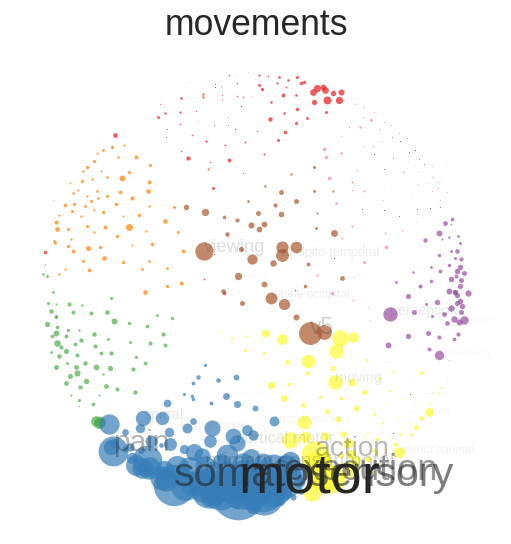

['spatial', 'parietal', 'superior parietal', 'intraparietal sulcus', 'parietal cortex', 'intraparietal', 'retrosplenial', 'calculation', 'posterior parietal', 'precuneus']


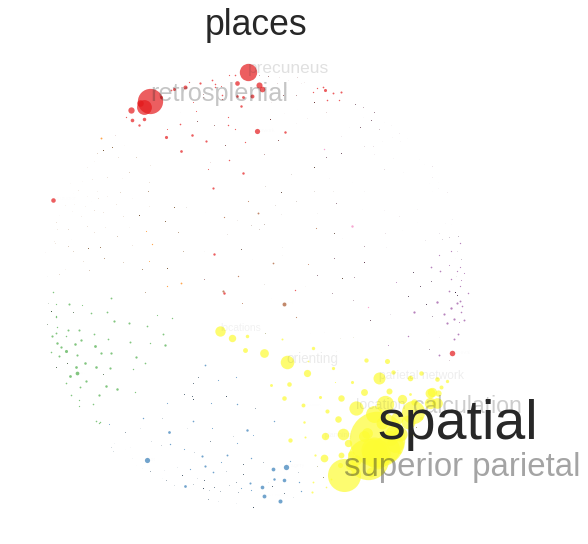

['theory mind', 'mind', 'temporo parietal', 'beliefs', 'mentalizing', 'mode network', 'mind tom', 'parietal junction', 'ventromedial', 'tom']


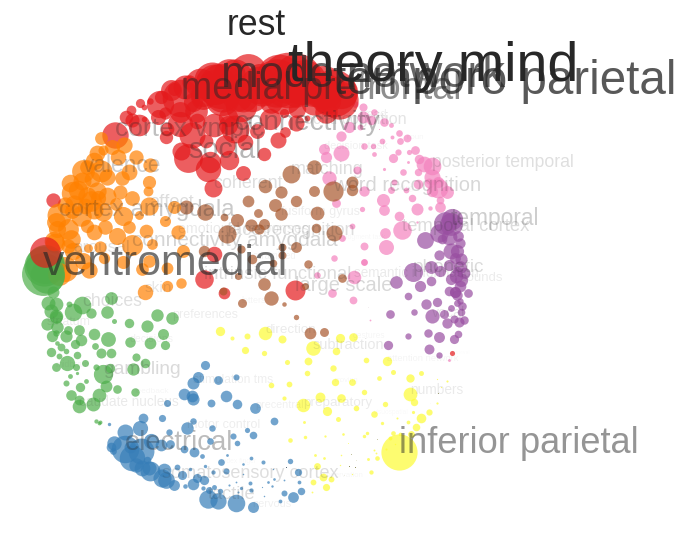

['reading', 'words', 'language', 'word', 'lexical', 'phonological', 'semantic', 'verbs', 'verb', 'inferior frontal']


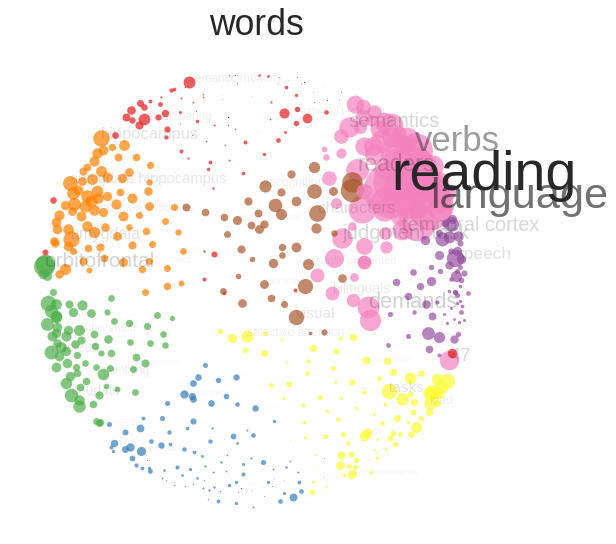

In [46]:
for im in ['../meanTraining/%s'%x for x in os.listdir('../meanTraining/')]:
    makeMeanMindSpace(im)

### For single blocks

In [47]:
def plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,ax):

    # loop both trough the positions and the predictions
    for p in mdsDf.index:
        l = kDf['n'].loc[p]
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    # to not omit the most important keywords, we move through the list by the order in minMaxDf
    sortedIndex = minMaxDf.sort_values('corr',ascending=False).index.labels[1]
    sortedNames = [minMaxDf.index.levels[1][x] for x in sortedIndex ]
        
    added = []
    counter = 5
    for p in sortedNames:
        l = kDf['n'].loc[p]
        x = mdsDf['0'].loc[p]
        y = mdsDf['1'].loc[p]

        if counter > 0:
            if not findNeighbors(mdsDf,p,added,notCloserThan=130):

                ax.annotate(p, xy = (x, y),
                        fontsize=minMaxDf.ix[l].ix[p]**3*70,
                        alpha=minMaxDf.ix[l].ix[p]**30*5)
                added.append(p)
                
                counter-=1
            
    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

In [48]:
def makeMindSpace(thisMap,
                  my_masker=my_masker,nsData=nsData,mdsDf=mdsDf,kDf=kDf,
                  myPalette=myPalette,clusterNames=clusterNames):

    scaleMap = extractMaps(thisMap,my_masker)

    thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
    
    thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T
    
    minMaxDf = makeMinMax(thisCorrDf)

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    
    plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,ax)
    
    fullName = thisMap.split('/')[-1].split('.')[0]
    nam = fullName.split('_')[-1]
    num = fullName.split('_')[1]
    plt.title('%s %s' % (num,nam),fontsize=72,y=1.04)
    
    plt.savefig('../nsfigs/synth_%s.png'%fullName,bbox_inches='tight',dpi=300)
    plt.show()

In [49]:
def sortBlocks(blocks):
    d = {}
    for i in blocks:
        num = i.split('/')[-1].split('.')[0]
        d[num] = i
    sortRunDf = pd.DataFrame(d,index=['filename']).T
    sortRunDf.sort_index(inplace=True)
    return sortRunDf

In [50]:
imgList = ['../test/%s'%x for x in os.listdir('../test/')]; imgList.sort()

In [51]:
sortRunDf = sortBlocks(imgList)

In [52]:
sortRunDf

filename
faces_051_movieactors      ../test/faces_051_movieactors.nii.gz
faces_058_athletes            ../test/faces_058_athletes.nii.gz
faces_064_family                ../test/faces_064_family.nii.gz
faces_067_friends              ../test/faces_067_friends.nii.gz
faces_074_politicians      ../test/faces_074_politicians.nii.gz
movements_055_badminton  ../test/movements_055_badminton.nii.gz
movements_060_swimming    ../test/movements_060_swimming.nii.gz
movements_065_badminton  ../test/movements_065_badminton.nii.gz
movements_070_tennis        ../test/movements_070_tennis.nii.gz
movements_075_climbing    ../test/movements_075_climbing.nii.gz
places_054_market              ../test/places_054_market.nii.gz
places_059_school              ../test/places_059_school.nii.gz
places_063_citysquare      ../test/places_063_citysquare.nii.gz
places_068_market              ../test/places_068_market.nii.gz
places_071_church              ../test/places_071_church.nii.gz
rest_053_rest                      ../test/rest_053_rest.nii.gz
rest_057_rest                      ../test/rest_057_rest.nii.gz
rest_061_rest                      ../test/rest_061_rest.nii.gz
rest_069_rest                      ../test/rest_069_rest.nii.gz
rest_072_rest                      ../test/rest_072_rest.nii.gz
words_052_countries          ../test/words_052_countries.nii.gz
words_056_animals              ../test/words_056_animals.nii.gz
words_062_animals              ../test/words_062_animals.nii.gz
words_066_tools                  ../test/words_066_tools.nii.gz
words_073_fruit                  ../test/words_073_fruit.nii.gz

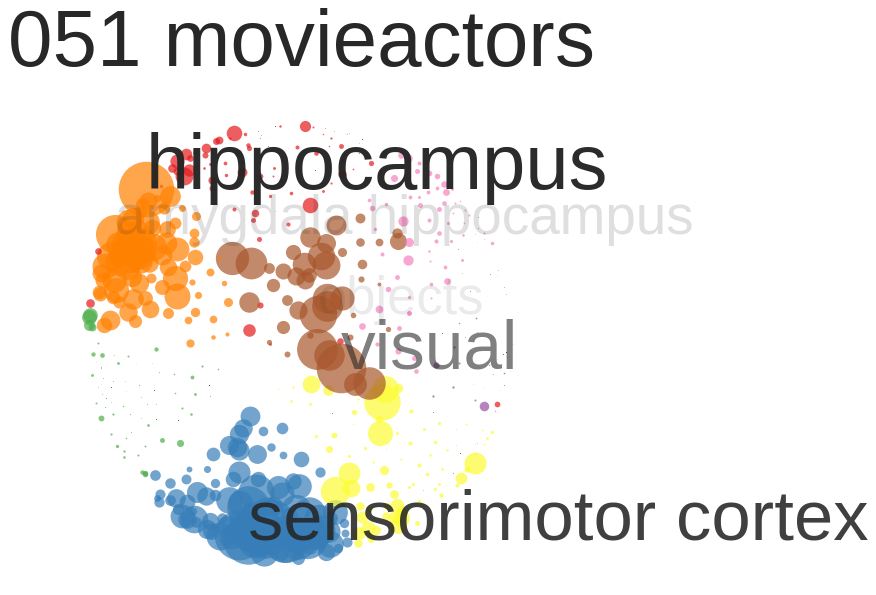

/data/martin/seminarSS17/venv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:184: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


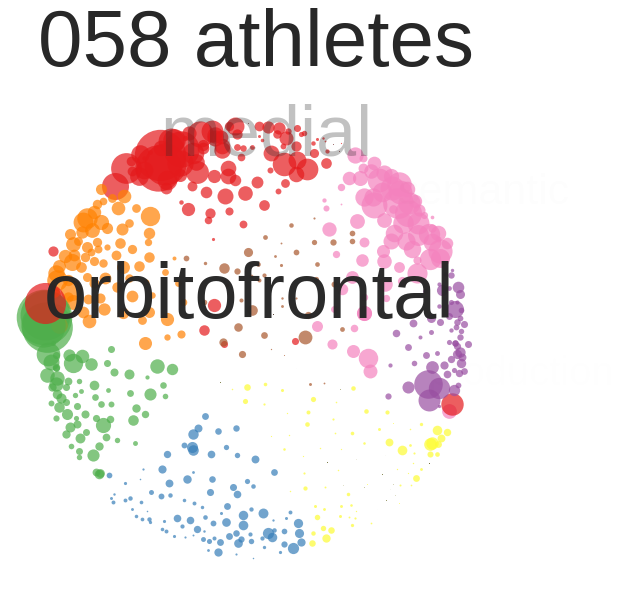

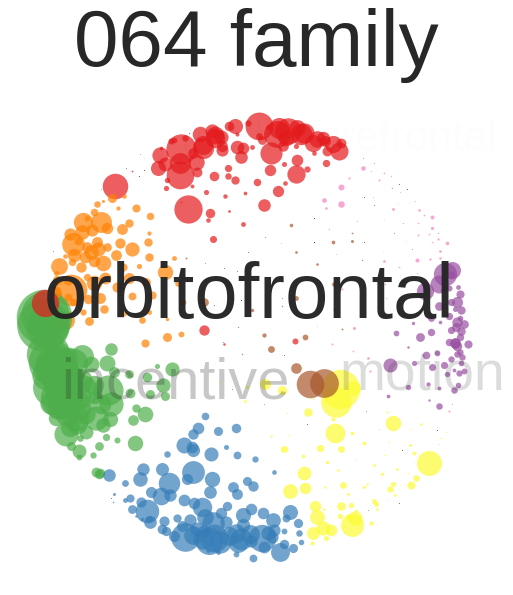

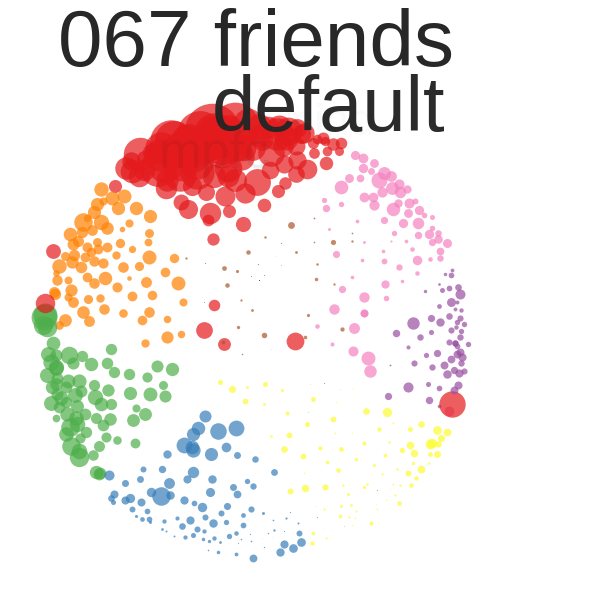

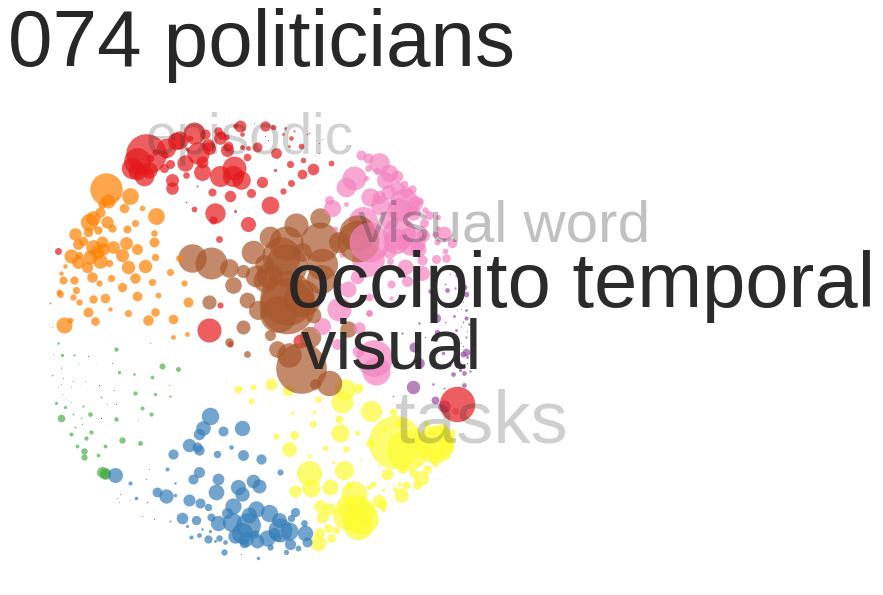

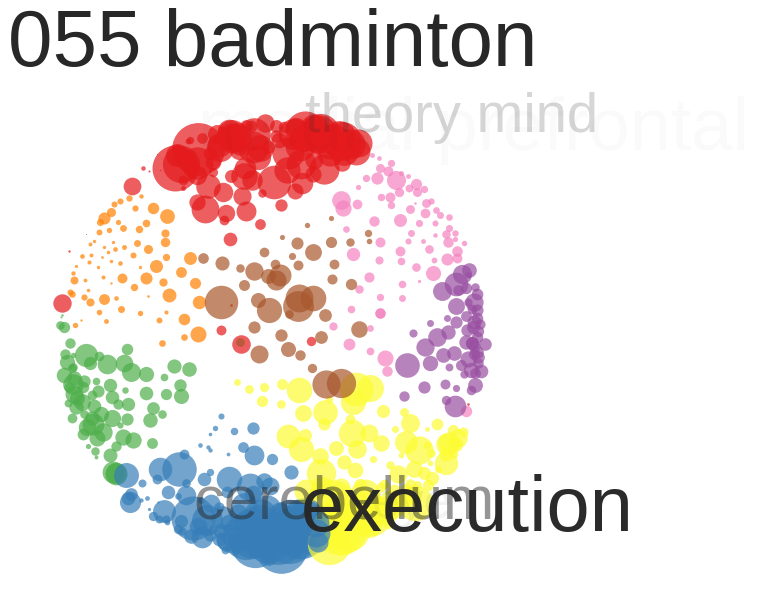

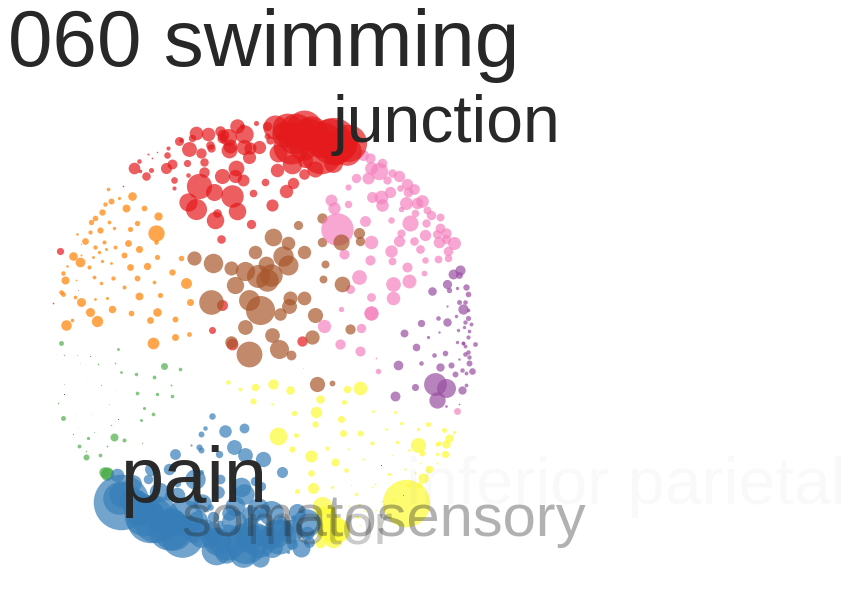

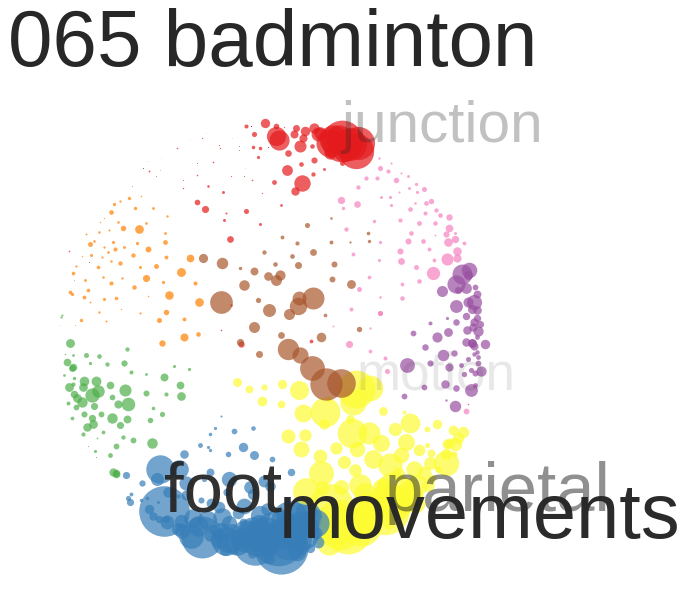

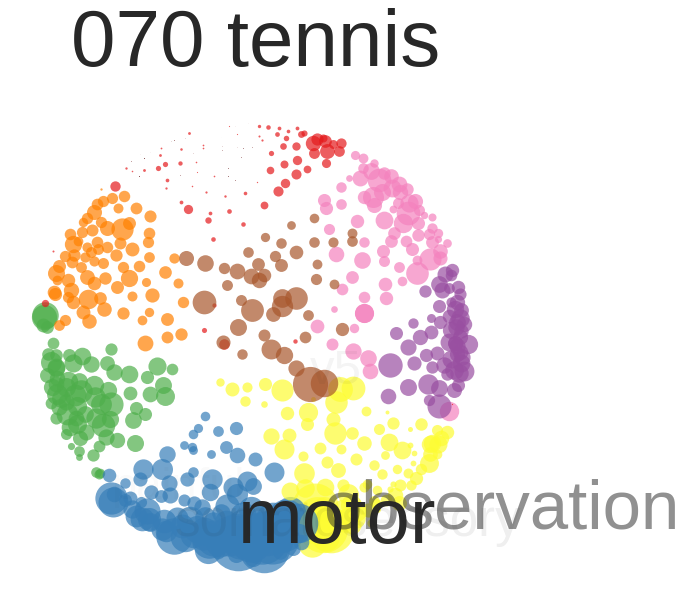

/data/martin/seminarSS17/venv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


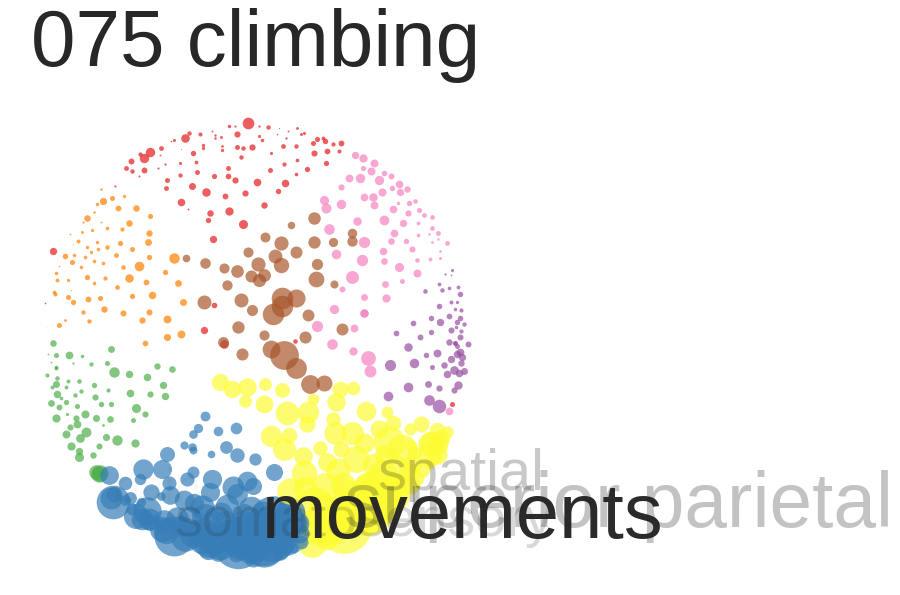

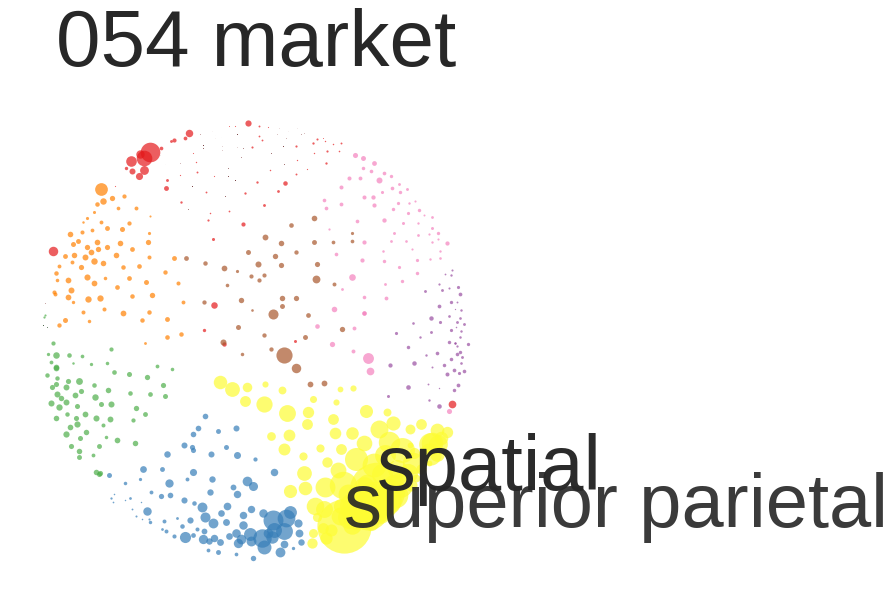

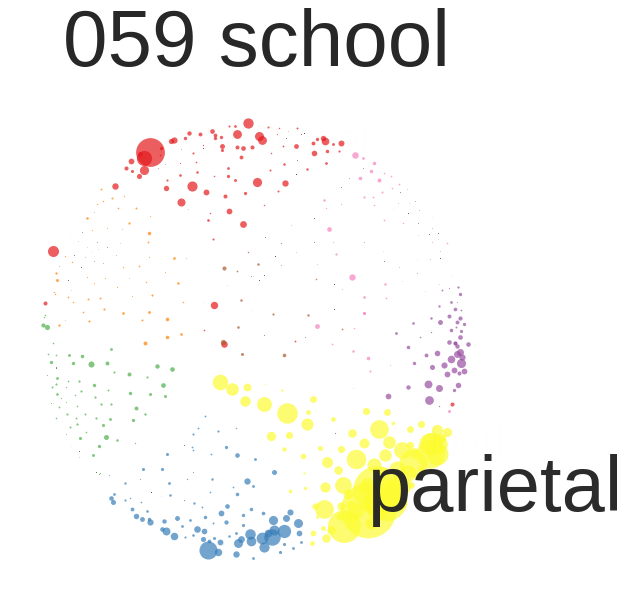

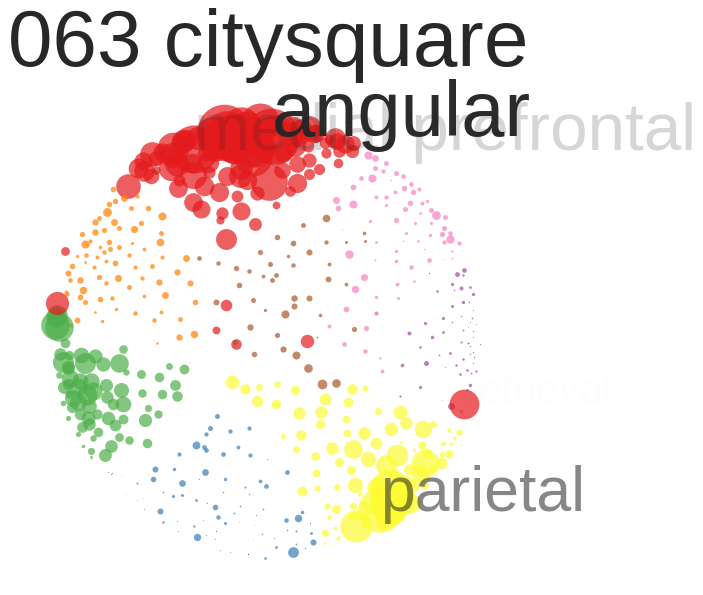

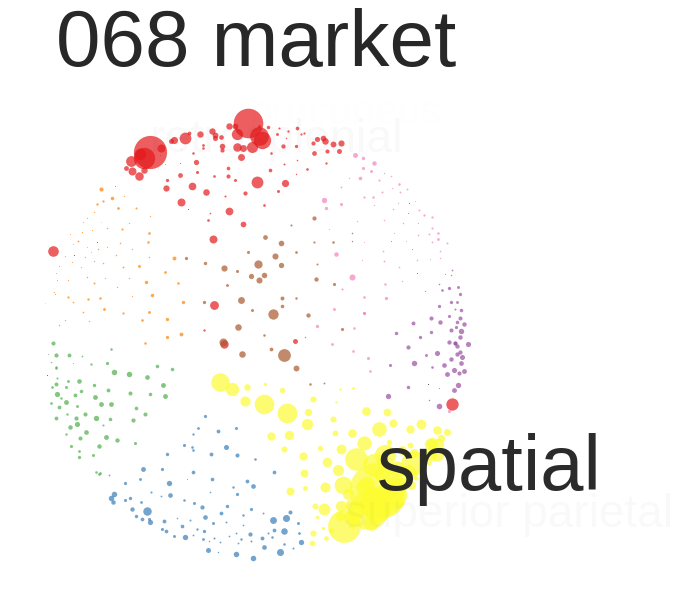

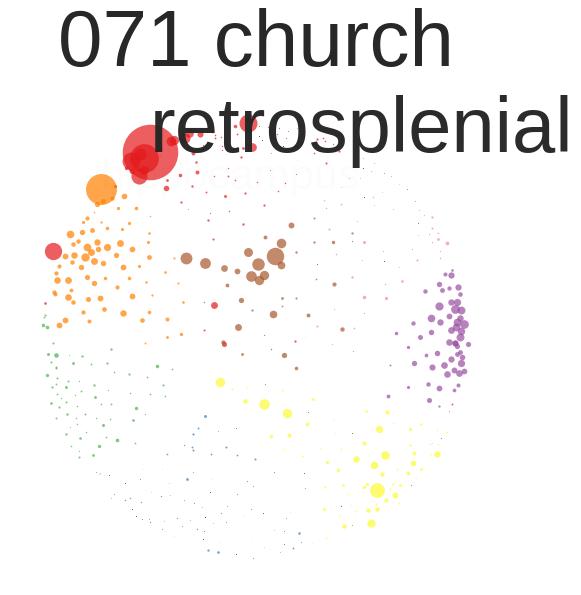

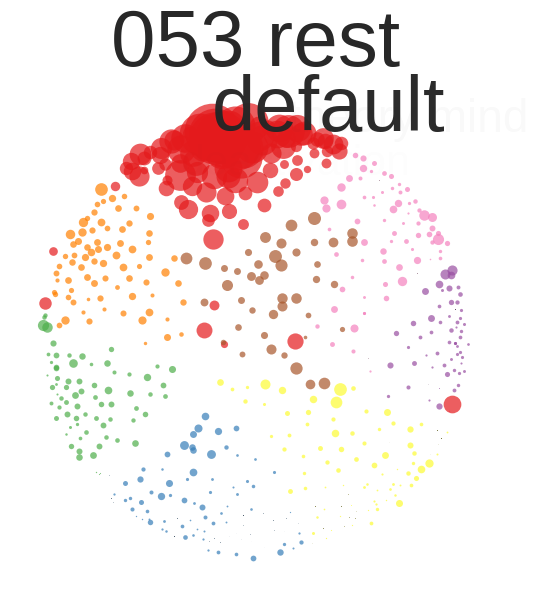

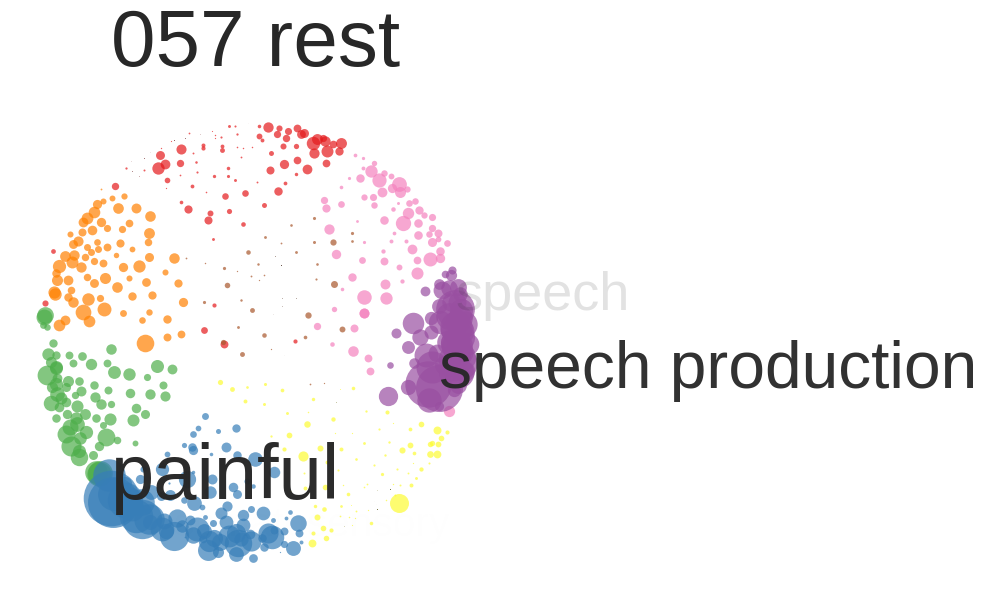

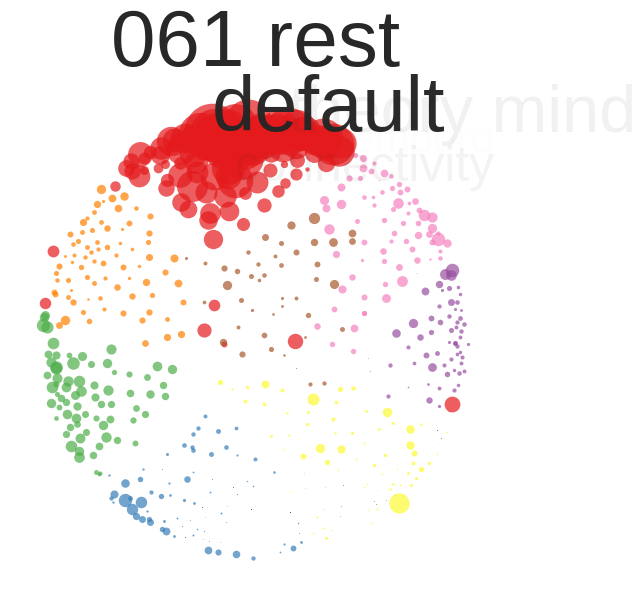

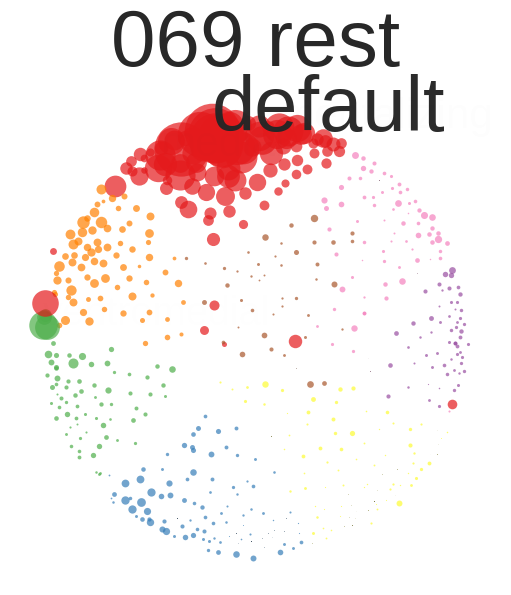

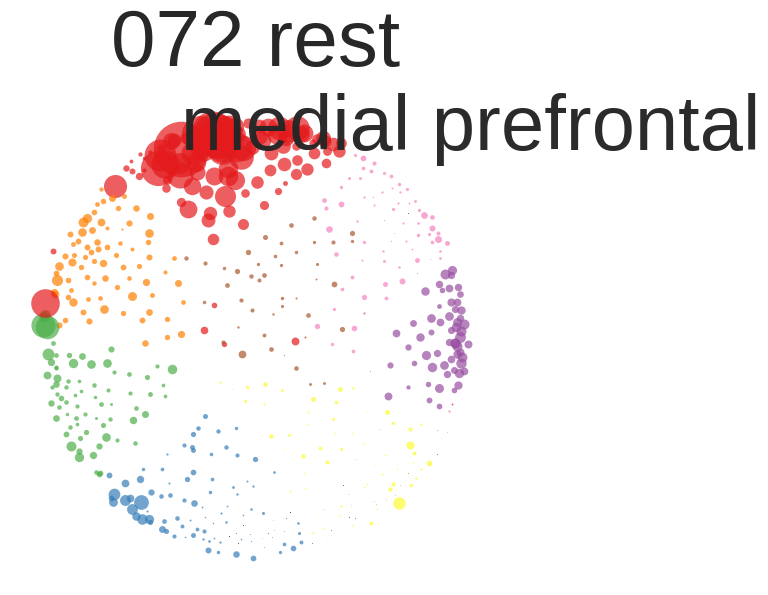

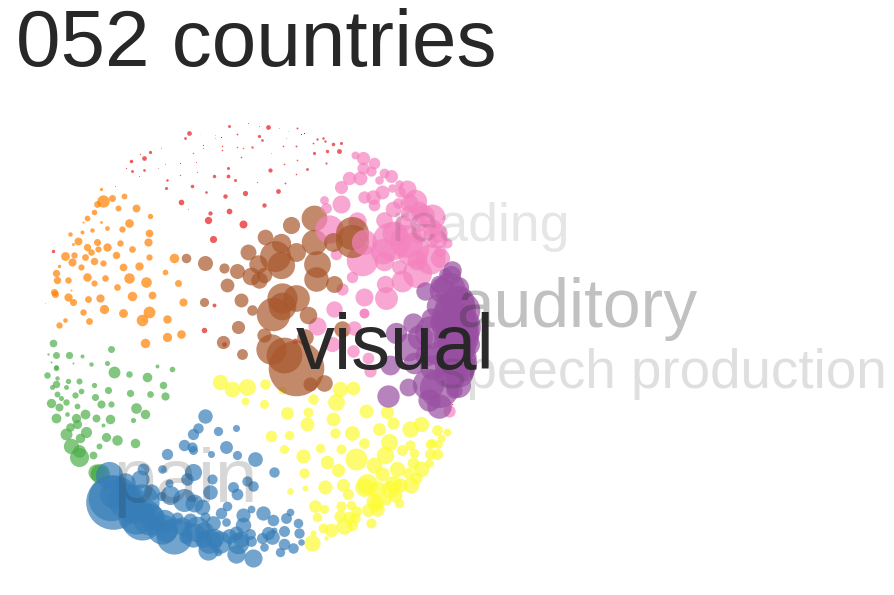

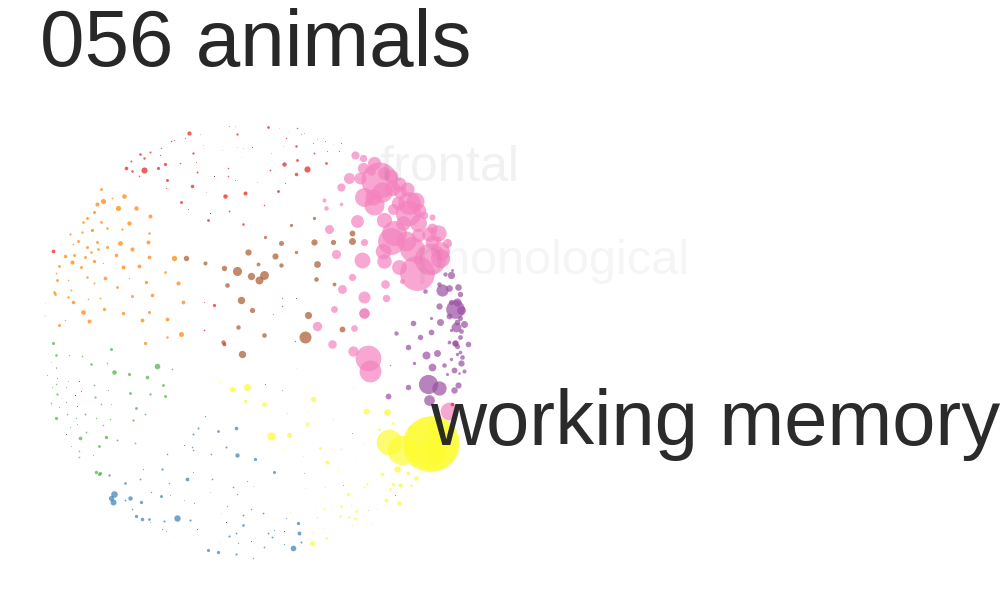

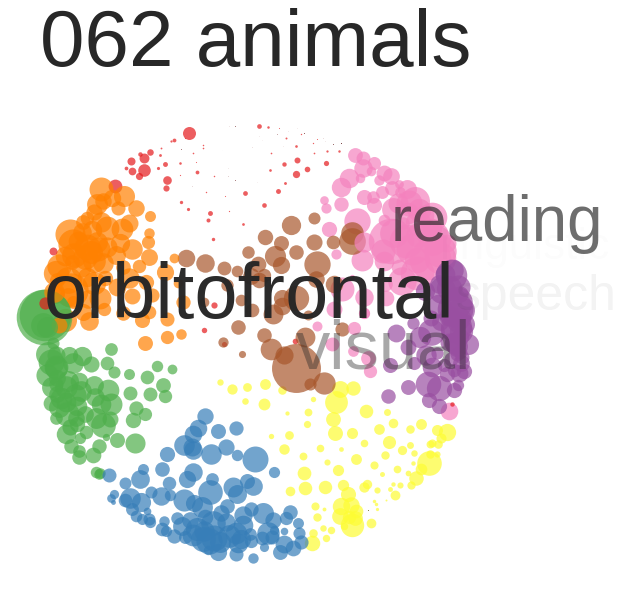

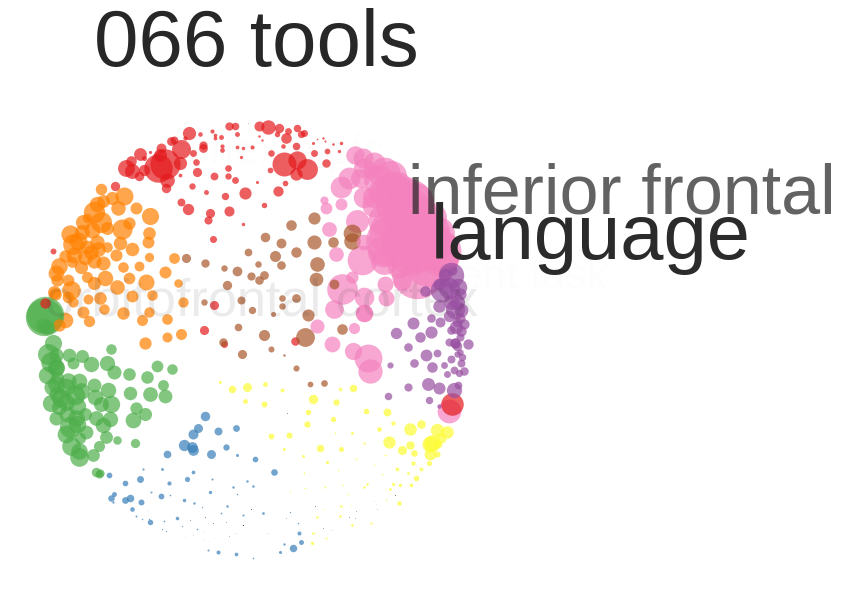

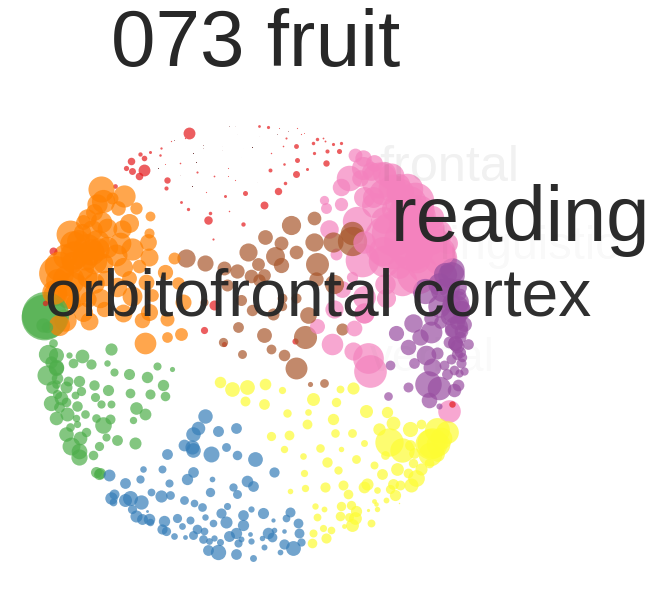

In [53]:
for i in sortRunDf.index:
    thisBlock = sortRunDf.ix[i]['filename']
    makeMindSpace(thisBlock)

In [54]:
from PIL import Image

In [55]:
ballList = ['../nsfigs/%s'%x for x in os.listdir('../nsfigs/') if x.startswith('synth') and '_00' not in x and 'meanCond' not in x]
ballList.sort()

In [56]:
ballList

['../nsfigs/synth_faces_051_movieactors.png',
 '../nsfigs/synth_faces_058_athletes.png',
 '../nsfigs/synth_faces_064_family.png',
 '../nsfigs/synth_faces_067_friends.png',
 '../nsfigs/synth_faces_074_politicians.png',
 '../nsfigs/synth_faces_pFgA_pF=0.png',
 '../nsfigs/synth_movements_055_badminton.png',
 '../nsfigs/synth_movements_060_swimming.png',
 '../nsfigs/synth_movements_065_badminton.png',
 '../nsfigs/synth_movements_070_tennis.png',
 '../nsfigs/synth_movements_075_climbing.png',
 '../nsfigs/synth_places_054_market.png',
 '../nsfigs/synth_places_059_school.png',
 '../nsfigs/synth_places_063_citysquare.png',
 '../nsfigs/synth_places_068_market.png',
 '../nsfigs/synth_places_071_church.png',
 '../nsfigs/synth_rest_053_rest.png',
 '../nsfigs/synth_rest_057_rest.png',
 '../nsfigs/synth_rest_061_rest.png',
 '../nsfigs/synth_rest_069_rest.png',
 '../nsfigs/synth_rest_072_rest.png',
 '../nsfigs/synth_words_052_countries.png',
 '../nsfigs/synth_words_056_animals.png',
 '../nsfigs/synth

In [57]:
a = []
for i in ballList:
    im = Image.open(i)
    thisAspect = im.getbbox()
    a.append(thisAspect)
    
whereMax = pd.DataFrame(a).idxmax(axis=0).max()
maxSize = tuple( pd.DataFrame(a).loc[whereMax]+2 )

ValueError: num must be 1 <= num <= 25, not 26

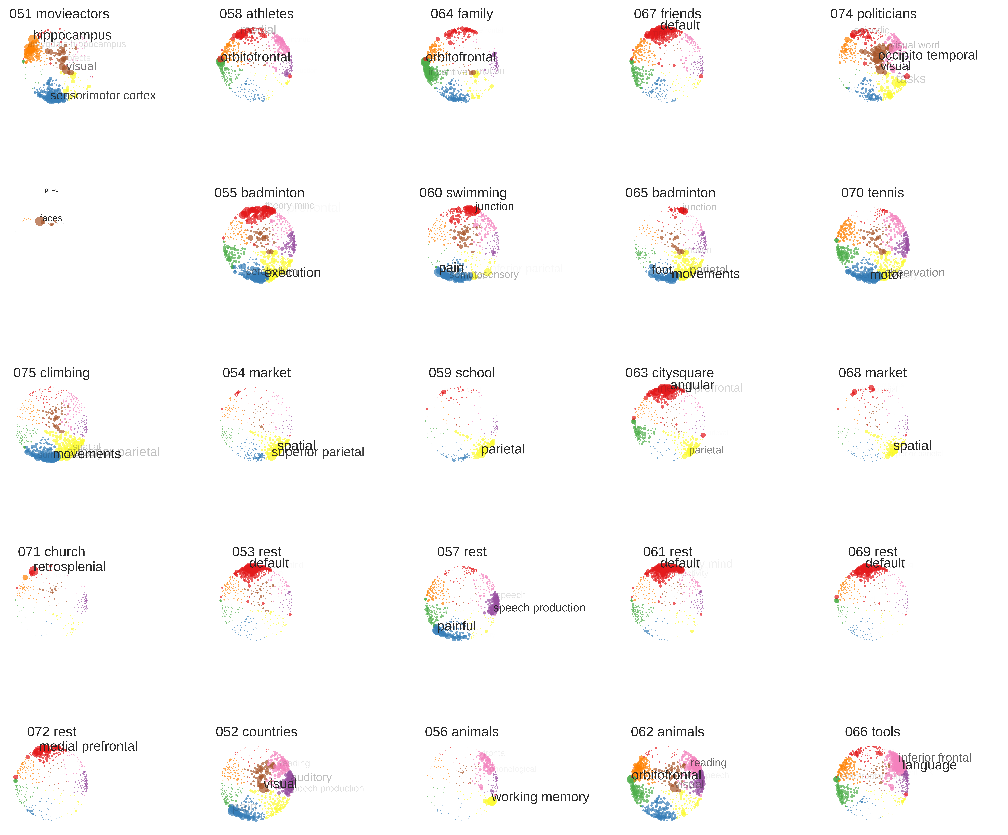

In [58]:
fig = plt.figure(figsize=(16,14))
for i,im in enumerate(ballList):
    ax = plt.subplot(5,5,i+1)
    
    mask = Image.new('RGBA', maxSize[2:],color=(255,255,255))
    mask.paste(Image.open(im),(0,0))
    ax.imshow( mask )
    ax.set_xticks([]);ax.set_yticks([])
    sns.despine(left=True,bottom=True)
plt.savefig('../nsfigs/nsSpacesTest.png',dpi=600,bbox_inches='tight')
plt.show()

### for the secret blocks

In [ ]:
for im in ['../outofsample/%s'%x for x in os.listdir('../outofsample/')]:
    makeMeanMindSpace(im)